# Data Train

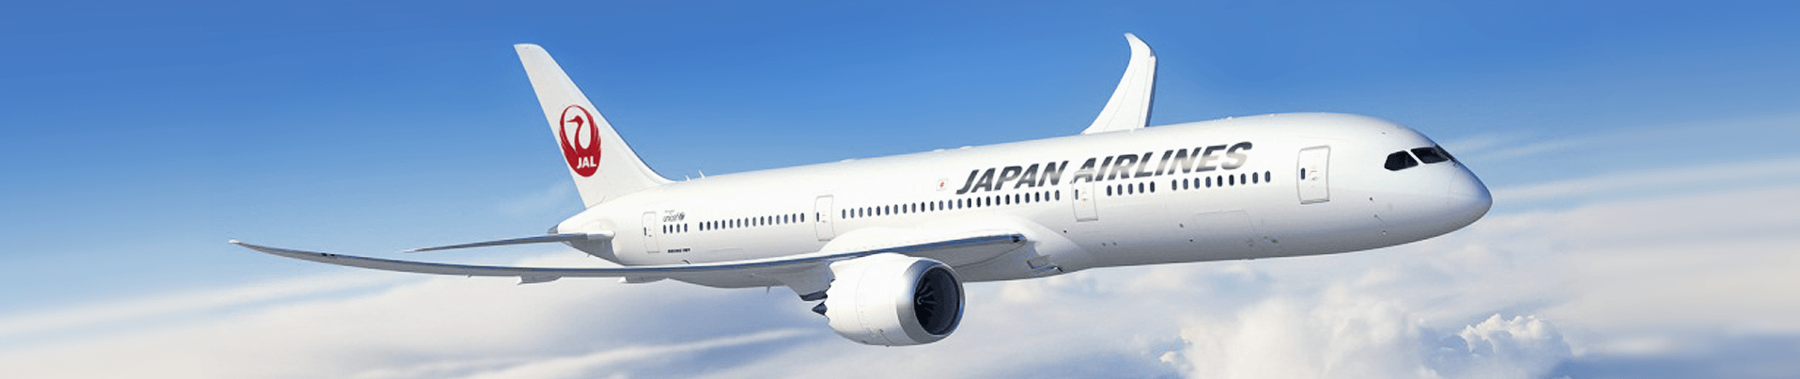

# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::
# Target:
# build a Regression model which will Predict the Price of the airline flights
# :::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

In [1]:
# Import necessary libraries

# Data manipulation and analysis
import pandas as pd  # Powerful library for data analysis and manipulation

# Interactive data visualization
import plotly_express as px  # High-level library for creating interactive visualizations
import plotly.graph_objects as go  # Lower-level library for more control over visualizations

# Numerical operations
import numpy as np  # Essential library for numerical computations and array operations

# Warning control
import warnings  # To manage and suppress warnings during code execution

# Statistical data visualization
import seaborn as sns  # Library for creating informative and aesthetic statistical graphics

# Static data visualization
import matplotlib.pyplot as plt  # Foundational library for creating static plots
plt.style.use('ggplot')  # Set a visually appealing style for plots

# Model persistence
import joblib  # Library for saving and loading machine learning models

# Outlier detection
from datasist.structdata import detect_outliers  # Function for identifying potential outliers

# Suppress warnings
warnings.filterwarnings('ignore')  # Prevent warnings from being displayed, potentially improving readability

In [2]:
df = pd.read_csv('Data_Train - Sheet1.csv')

In [3]:
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10678              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20         11:20       3h    non-stop   
10681              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753  

[10683 rows x 11 columns]

In [4]:
# This function 'summary' takes a DataFrame 'df' as input and generates a summary report for the data.
# It calculates and displays information such as the shape of the DataFrame, data types, missing values,
# unique values, basic descriptive statistics (min, max, mean), and the first three values of the dataset.
# The summary is returned as a DataFrame.

def summary(df):
    # Display the shape of the DataFrame
    print(f'data shape: {df.shape}')

    # Create a summary DataFrame with data types
    summ = pd.DataFrame(df.dtypes, columns=['data type'])

    # Calculate and add the number of missing values
    summ['#missing'] = df.isnull().sum().values

    # Calculate and add the percentage of missing values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100

    # Calculate and add the number of unique values
    summ['#unique'] = df.nunique().values

    # Create a DataFrame with basic descriptive statistics
    desc = pd.DataFrame(df.describe(include='all').transpose())

    # Add minimum, maximum, mean, and the first three values to the summary DataFrame
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['mean'] = desc['mean'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values

    # Return the summary DataFrame
    return summ

# To use this function and generate a summary of your DataFrame 'df', you can call it like this:
summary(df)


data shape: (10683, 11)


data type  #missing  %missing  #unique     min      max  \
Airline            object         0  0.000000       12     NaN      NaN   
Date_of_Journey    object         0  0.000000       44     NaN      NaN   
Source             object         0  0.000000        5     NaN      NaN   
Destination        object         0  0.000000        6     NaN      NaN   
Route              object         1  0.009361      128     NaN      NaN   
Dep_Time           object         0  0.000000      222     NaN      NaN   
Arrival_Time       object         0  0.000000     1343     NaN      NaN   
Duration           object         0  0.000000      368     NaN      NaN   
Total_Stops        object         1  0.009361        5     NaN      NaN   
Additional_Info    object         0  0.000000       10     NaN      NaN   
Price               int64         0  0.000000     1870  1759.0  79512.0   

                        mean   first value           second value  
Airline                  NaN        IndiGo              Air India  
Date_of_Journey          NaN    24/03/2019              1/05/2019  
Source                   NaN      Banglore                Kolkata  
Destination              NaN     New Delhi               Banglore  
Route                    NaN     BLR → DEL  CCU → IXR → BBI → BLR  
Dep_Time                 NaN         22:20                  05:50  
Arrival_Time             NaN  01:10 22 Mar                  13:15  
Duration                 NaN        2h 50m                 7h 25m  
Total_Stops              NaN      non-stop                2 stops  
Additional_Info          NaN       No info                No info  
Price            9087.064121          3897                   7662

In [5]:
df.dropna(inplace=True)

In [6]:
# Check Duplicated
df.duplicated().sum()

220

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.reset_index(drop=True , inplace=True)

In [9]:
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10457     Air Asia       9/04/2019   Kolkata    Banglore   
10458    Air India      27/04/2019   Kolkata    Banglore   
10459  Jet Airways      27/04/2019  Banglore       Delhi   
10460      Vistara      01/03/2019  Banglore   New Delhi   
10461    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3            CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4            BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
...                      ...      ...           ...      ...         ...   
10457              CCU → BLR    19:55         22:25   2h 30m    non-stop   
10458              CCU → BLR    20:45         23:20   2h 35m    non-stop   
10459              BLR → DEL    08:20         11:20       3h    non-stop   
10460              BLR → DEL    11:30         14:10   2h 40m    non-stop   
10461  DEL → GOI → BOM → COK    10:55         19:15   8h 20m     2 stops   

      Additional_Info  Price  
0             No info   3897  
1             No info   7662  
2             No info  13882  
3             No info   6218  
4             No info  13302  
...               ...    ...  
10457         No info   4107  
10458         No info   4145  
10459         No info   7229  
10460         No info  12648  
10461         No info  11753  

[10462 rows x 11 columns]

# Columns Handling

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Airline

In [11]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [12]:
df['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

def fix_Airline(x):
    if pd.notna(x):
        if 'Multiple carriers Premium economy' in x:
            return x.replace('Multiple carriers Premium economy', 'Multiple carriers')
        elif 'Jet Airways Business' in x:
            return x.replace('Jet Airways Business', 'Jet Airways')
        elif 'Vistara Premium economy' in x:
            return x.replace('Vistara Premium economy', 'Vistara Premium')
    else:
        return np.nan

In [13]:
def fix_Airline(x):
    if x == 'Multiple carriers Premium economy':
        return 'Multiple carriers'
    elif x == 'Jet Airways Business':
        return 'Jet Airways'
    elif x == 'Vistara Premium economy':
        return 'Vistara'
    else:
        return x

In [14]:
df['Airline'] = df['Airline'].astype(str).apply(fix_Airline)

In [15]:
drop_idx = df[df['Airline']== 'Trujet'].index

In [16]:
df.drop(drop_idx , axis=0 , inplace=True)
df.reset_index(drop=True , inplace=True)

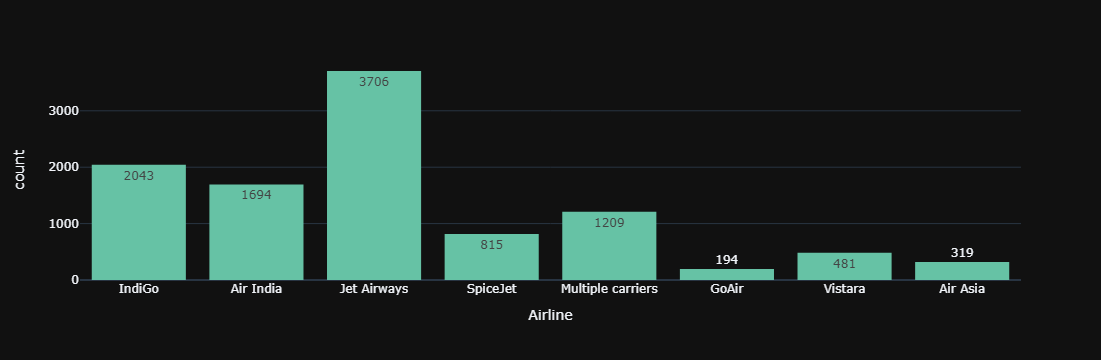

In [17]:
px.histogram(data_frame= df, x='Airline',template='plotly_dark',  # Choose a template from available options
       color_discrete_sequence=px.colors.qualitative.Set2,text_auto='True')

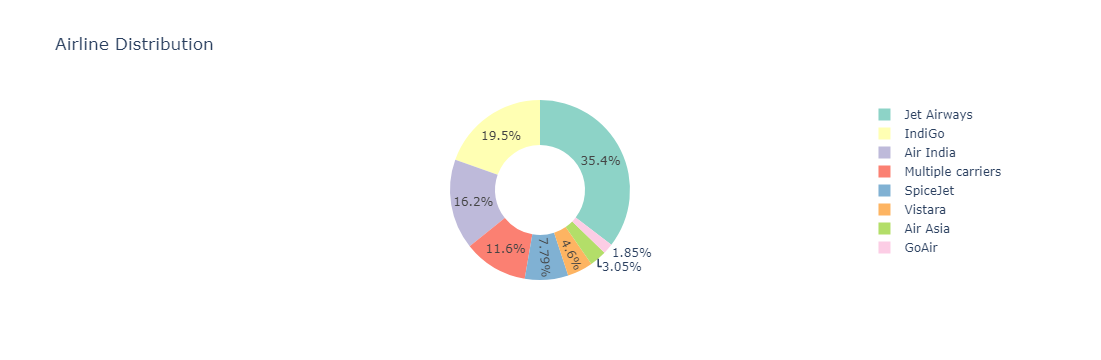

In [18]:
# Count the occurrences of each unique value in the 'Source' column.
value_counts_df = df['Airline'].value_counts().reset_index()
value_counts_df.columns = ['Airline', 'Count']

# Creates a pie chart using Plotly Express (px) to visualize the distribution of 'Source' values in the DataFrame df.
fig = px.pie(value_counts_df, names='Airline', hole=0.5,values='Count',
             title='Airline Distribution', color_discrete_sequence=px.colors.qualitative.Set3)

# Show the chart
fig.show()

In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Date_of_Journey

In [20]:
df['Date_of_Journey'].unique().tolist()

['24/03/2019',
 '1/05/2019',
 '9/06/2019',
 '12/05/2019',
 '01/03/2019',
 '24/06/2019',
 '12/03/2019',
 '27/05/2019',
 '1/06/2019',
 '18/04/2019',
 '9/05/2019',
 '24/04/2019',
 '3/03/2019',
 '15/04/2019',
 '12/06/2019',
 '6/03/2019',
 '21/03/2019',
 '3/04/2019',
 '6/05/2019',
 '15/05/2019',
 '18/06/2019',
 '15/06/2019',
 '6/04/2019',
 '18/05/2019',
 '27/06/2019',
 '21/05/2019',
 '06/03/2019',
 '3/06/2019',
 '15/03/2019',
 '3/05/2019',
 '9/03/2019',
 '6/06/2019',
 '24/05/2019',
 '09/03/2019',
 '1/04/2019',
 '21/04/2019',
 '21/06/2019',
 '27/03/2019',
 '18/03/2019',
 '12/04/2019',
 '9/04/2019',
 '1/03/2019',
 '03/03/2019',
 '27/04/2019']

In [21]:
df['Date_of_Journey']=df['Date_of_Journey'].astype(str)

In [22]:
from datetime import datetime

# Assuming df is your DataFrame and 'Date' is the column you want to modify
def pad_date(date_string):
    # Convert the string to a datetime object
    date_obj = datetime.strptime(date_string, '%d/%m/%Y')
    
    # Format the datetime object with leading zeros for day and month
    padded_date = date_obj.strftime('%d/%m/%Y')
    
    return padded_date

In [23]:
df['Date_of_Journey']=df['Date_of_Journey'].apply(pad_date)

In [24]:
df['Date_of_Journey'].unique().tolist()

['24/03/2019',
 '01/05/2019',
 '09/06/2019',
 '12/05/2019',
 '01/03/2019',
 '24/06/2019',
 '12/03/2019',
 '27/05/2019',
 '01/06/2019',
 '18/04/2019',
 '09/05/2019',
 '24/04/2019',
 '03/03/2019',
 '15/04/2019',
 '12/06/2019',
 '06/03/2019',
 '21/03/2019',
 '03/04/2019',
 '06/05/2019',
 '15/05/2019',
 '18/06/2019',
 '15/06/2019',
 '06/04/2019',
 '18/05/2019',
 '27/06/2019',
 '21/05/2019',
 '03/06/2019',
 '15/03/2019',
 '03/05/2019',
 '09/03/2019',
 '06/06/2019',
 '24/05/2019',
 '01/04/2019',
 '21/04/2019',
 '21/06/2019',
 '27/03/2019',
 '18/03/2019',
 '12/04/2019',
 '09/04/2019',
 '27/04/2019']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10461 entries, 0 to 10460
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10461 non-null  object
 1   Date_of_Journey  10461 non-null  object
 2   Source           10461 non-null  object
 3   Destination      10461 non-null  object
 4   Route            10461 non-null  object
 5   Dep_Time         10461 non-null  object
 6   Arrival_Time     10461 non-null  object
 7   Duration         10461 non-null  object
 8   Total_Stops      10461 non-null  object
 9   Additional_Info  10461 non-null  object
 10  Price            10461 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 899.1+ KB


In [26]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'] , errors='coerce' , format='%d/%m/%Y')

In [27]:
df['month_of_Journey'] = df['Date_of_Journey'].dt.month

In [28]:
df['day_of_Journey'] = df['Date_of_Journey'].dt.day

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Source

In [29]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [30]:
df['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: count, dtype: int64

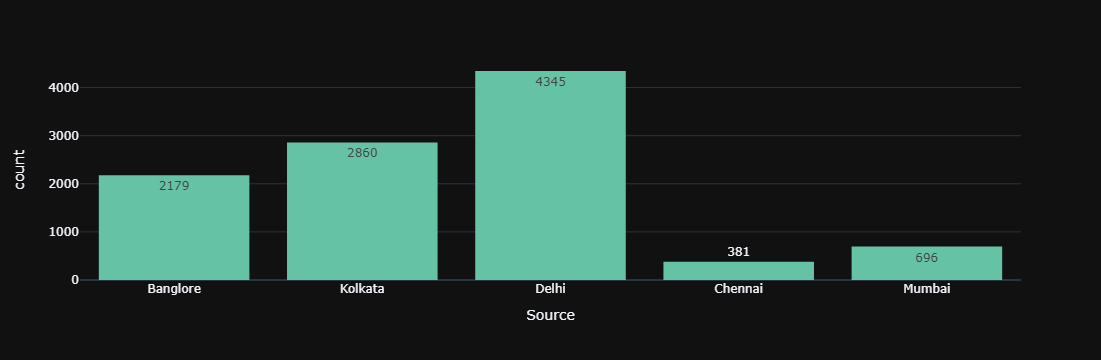

In [31]:
px.histogram(data_frame= df, x='Source',template='plotly_dark',  # Choose a template from available options
       color_discrete_sequence=px.colors.qualitative.Set2,text_auto='True')

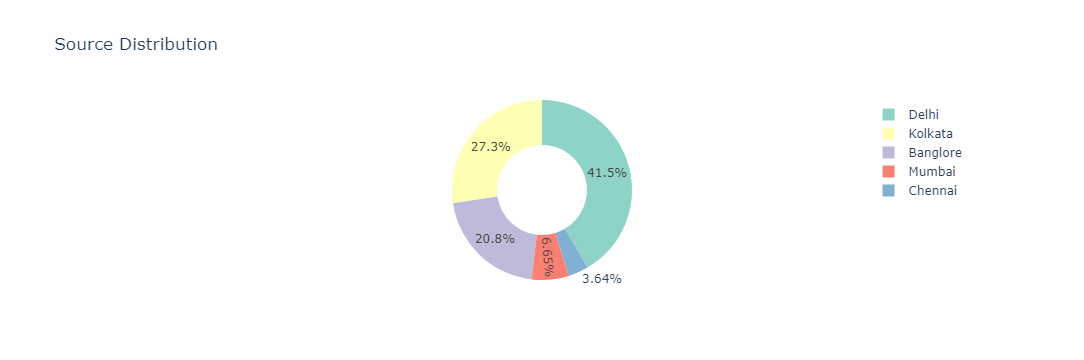

In [32]:
# Count the occurrences of each unique value in the 'Source' column.
value_counts_df = df['Source'].value_counts().reset_index()
value_counts_df.columns = ['Source', 'Count']

# Creates a pie chart using Plotly Express (px) to visualize the distribution of 'Source' values in the DataFrame df.
fig = px.pie(value_counts_df, names='Source', hole=0.5,values='Count',
             title='Source Distribution', color_discrete_sequence=px.colors.qualitative.Set3)

# Show the chart
fig.show()

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Destination

In [33]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [34]:
df['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: count, dtype: int64

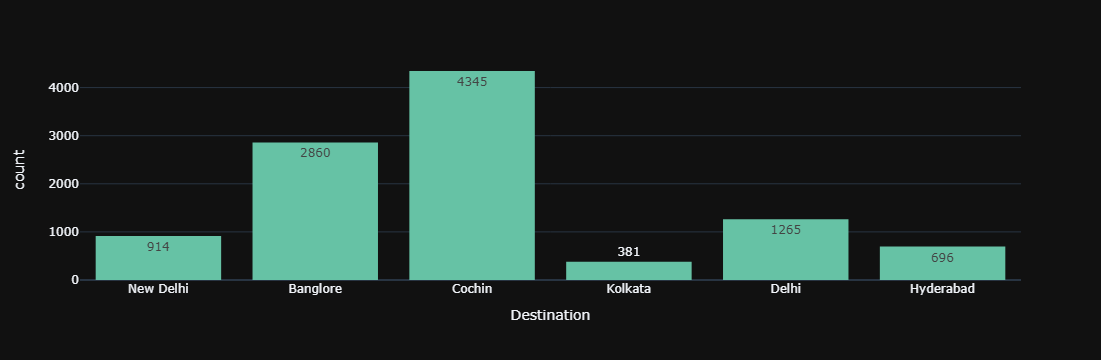

In [35]:
px.histogram(data_frame= df, x='Destination',template='plotly_dark',  # Choose a template from available options
       color_discrete_sequence=px.colors.qualitative.Set2,text_auto='True')

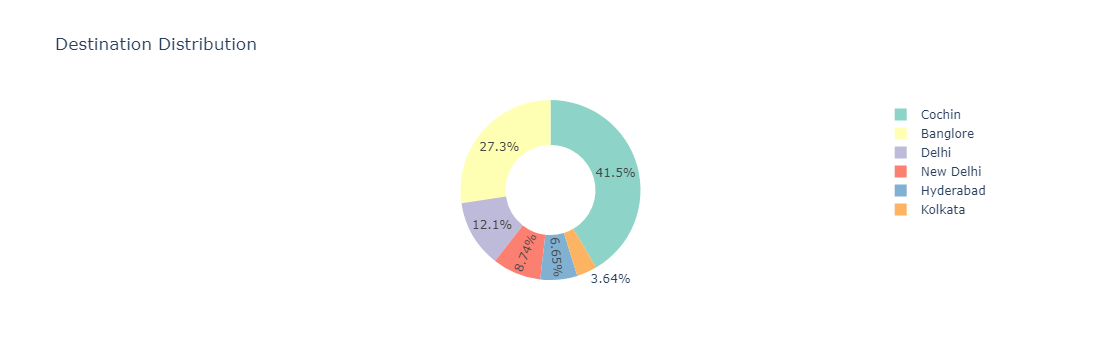

In [36]:
# Count the occurrences of each unique value in the 'Source' column.
value_counts_df = df['Destination'].value_counts().reset_index()
value_counts_df.columns = ['Destination', 'Count']

# Creates a pie chart using Plotly Express (px) to visualize the distribution of 'Source' values in the DataFrame df.
fig = px.pie(value_counts_df, names='Destination', hole=0.5,values='Count',
             title='Destination Distribution', color_discrete_sequence=px.colors.qualitative.Set3)
# Show the chart
fig.show()

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Route

In [37]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [38]:
df['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1536
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → RPR → HYD → BLR       1
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → BBI → HYD             1
Name: count, Length: 127, dtype: int64

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Dep_Time

In [39]:
df['Dep_Time'].unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

In [40]:
def categorize_dep_time(dep_time):
    # Replace ':' with '.' in the Dep_Time
    dep_time_new = dep_time.replace(":", ".")
    
    # Convert the replaced Dep_Time to float
    dep_time_float = float(dep_time_new)
    
    # Categorize the time based on the specified conditions
    if 4.00 <= dep_time_float <= 11.59:
        return 'Morning'
    elif 11.59 < dep_time_float < 18.00:
        return 'Afternoon'
    elif 18.00 <= dep_time_float <= 23.59:
        return 'Evening'
    elif 0.00 < dep_time_float <= 4.00:
        return 'Night'
    else:
        return 'Unknown'

In [41]:
# Apply the function to create a new column 'N_Dep_Time'
df['Dep_Period'] = df['Dep_Time'].apply(categorize_dep_time)

In [42]:
df['Dep_Period'].value_counts()

Dep_Period
Morning      4975
Evening      2629
Afternoon    2562
Night         295
Name: count, dtype: int64

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Arrival_Time	

In [43]:
df['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10456           22:25
10457           23:20
10458           11:20
10459           14:10
10460           19:15
Name: Arrival_Time, Length: 10461, dtype: object

In [44]:
# Function to extract the time part
def extract_time(time_str):
    # Split the string by space and take the first part
    return time_str.split(' ')[0]

# Apply the function to the 'Arrival_Time' column
df['Arrival_time'] = df['Arrival_Time'].apply(extract_time)

In [45]:
df['Arrival_time']

0        01:10
1        13:15
2        04:25
3        23:30
4        21:35
         ...  
10456    22:25
10457    23:20
10458    11:20
10459    14:10
10460    19:15
Name: Arrival_time, Length: 10461, dtype: object

In [46]:
def categorize_time(arrival_time):
    # Extract hours and minutes from the Arrival_Time
    arrival_time_new = arrival_time[0:5].replace(":", ".")
    
    # Convert the extracted time to float
    arrival_time_float = float(arrival_time_new)
    
    # Categorize the time based on the specified conditions
    if 4.00 <= arrival_time_float <= 11.59:
        return 'Morning'
    elif 11.59 < arrival_time_float < 18.00:
        return 'Afternoon'
    elif 18.00 <= arrival_time_float <= 23.59:
        return 'Evening'
    elif 0.00 < arrival_time_float <= 4.00:
        return 'Night'
    else:
        return 'Unknown'

# Apply the function to create a new column 'Arrival_Time_New'
df['Arrival_Period'] = df['Arrival_Time'].apply(categorize_time)
df['Arrival_Period'].value_counts()

Arrival_Period
Evening      4268
Morning      3020
Afternoon    2200
Night         973
Name: count, dtype: int64

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Duration

In [47]:
df['Duration']

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10456    2h 30m
10457    2h 35m
10458        3h
10459    2h 40m
10460    8h 20m
Name: Duration, Length: 10461, dtype: object

In [48]:
# Function to convert time duration strings to minutes
def convert_to_minutes(duration_str):
    total_minutes = 0
    # Split the string by space and iterate through the parts
    for part in duration_str.split():
        if 'h' in part:
            # Extract hours and convert to minutes
            total_minutes += int(part[:-1]) * 60
        elif 'm' in part:
            # Extract minutes
            total_minutes += int(part[:-1])
    return total_minutes

# Apply the function to the 'Duration' column
df['Duration (minutes)'] = df['Duration'].apply(convert_to_minutes)

In [49]:
df['Duration (minutes)']

0         170
1         445
2        1140
3         325
4         285
         ... 
10456     150
10457     155
10458     180
10459     160
10460     500
Name: Duration (minutes), Length: 10461, dtype: int64

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Total_Stops

In [50]:
df['Total_Stops'].value_counts()

Total_Stops
1 stop      5624
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [51]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x:x.split(' ')[0])

In [52]:
df['Total_Stops'] = df['Total_Stops'].apply(lambda x:x.replace('non-stop' , '0'))

In [53]:
df['Total_Stops'].value_counts()

Total_Stops
1    5624
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Additional_Info

In [54]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [55]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8181
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [56]:
df['Additional_Info'] = df['Additional_Info'].apply(lambda x:x.replace('No Info' , 'No info'))

In [57]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8184
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

In [58]:
def fix_Additional_Info(x):
    if x == '1 Long layover':
        return 'Other'
    elif x == 'Change airports':
        return 'Other'
    elif x == '1 Short layover':
        return 'Other'
    elif x == 'Red-eye flight':
        return 'Other'
    elif x == 'Business class':
        return 'Other'
    elif x == '2 Long layover':
        return 'Other'
    else:
        return x
df['Additional_Info'] = df['Additional_Info'].apply(fix_Additional_Info)

In [59]:
df['Additional_Info'].value_counts()

Additional_Info
No info                         8184
In-flight meal not included     1926
No check-in baggage included     318
Other                             33
Name: count, dtype: int64

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

## Price

In [60]:
df['Price'].describe()

count    10461.000000
mean      9027.257432
std       4624.823766
min       1759.000000
25%       5224.000000
50%       8266.000000
75%      12346.000000
max      79512.000000
Name: Price, dtype: float64

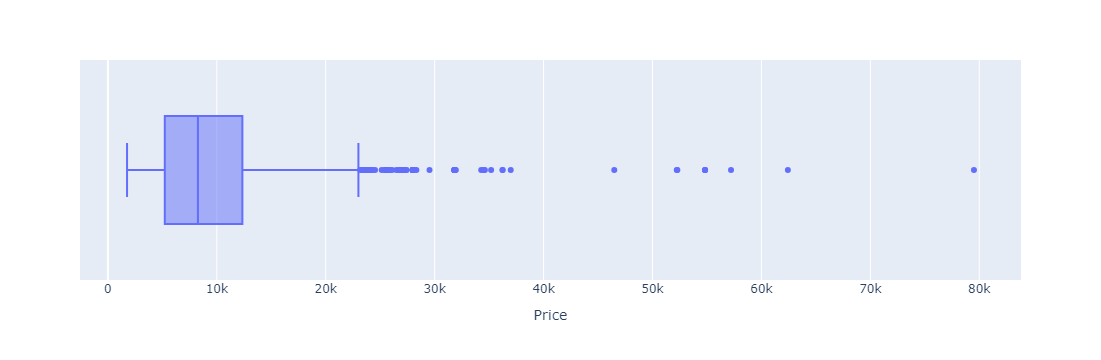

In [61]:
px.box(df,x='Price')

In [62]:
# Convert the 'Price' column to a numeric type (e.g., float)
df['Price'] = df['Price'].astype(float)

In [63]:
df

Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10456     Air Asia      2019-04-09   Kolkata    Banglore   
10457    Air India      2019-04-27   Kolkata    Banglore   
10458  Jet Airways      2019-04-27  Banglore       Delhi   
10459      Vistara      2019-03-01  Banglore   New Delhi   
10460    Air India      2019-05-09     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m           0   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m           2   
2      DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h           2   
3            CCU → NAG → BLR    18:05         23:30   5h 25m           1   
4            BLR → NAG → DEL    16:50         21:35   4h 45m           1   
...                      ...      ...           ...      ...         ...   
10456              CCU → BLR    19:55         22:25   2h 30m           0   
10457              CCU → BLR    20:45         23:20   2h 35m           0   
10458              BLR → DEL    08:20         11:20       3h           0   
10459              BLR → DEL    11:30         14:10   2h 40m           0   
10460  DEL → GOI → BOM → COK    10:55         19:15   8h 20m           2   

      Additional_Info    Price  month_of_Journey  day_of_Journey Dep_Period  \
0             No info   3897.0                 3              24    Evening   
1             No info   7662.0                 5               1    Morning   
2             No info  13882.0                 6               9    Morning   
3             No info   6218.0                 5              12    Evening   
4             No info  13302.0                 3               1  Afternoon   
...               ...      ...               ...             ...        ...   
10456         No info   4107.0                 4               9    Evening   
10457         No info   4145.0                 4              27    Evening   
10458         No info   7229.0                 4              27    Morning   
10459         No info  12648.0                 3               1    Morning   
10460         No info  11753.0                 5               9    Morning   

      Arrival_time Arrival_Period  Duration (minutes)  
0            01:10          Night                 170  
1            13:15      Afternoon                 445  
2            04:25        Morning                1140  
3            23:30        Evening                 325  
4            21:35        Evening                 285  
...            ...            ...                 ...  
10456        22:25        Evening                 150  
10457        23:20        Evening                 155  
10458        11:20        Morning                 180  
10459        14:10      Afternoon                 160  
10460        19:15        Evening                 500  

[10461 rows x 17 columns]

In [64]:
summary(df)

data shape: (10461, 17)


data type  #missing  %missing  #unique  \
Airline                     object         0       0.0        8   
Date_of_Journey     datetime64[ns]         0       0.0       40   
Source                      object         0       0.0        5   
Destination                 object         0       0.0        6   
Route                       object         0       0.0      127   
Dep_Time                    object         0       0.0      222   
Arrival_Time                object         0       0.0     1343   
Duration                    object         0       0.0      368   
Total_Stops                 object         0       0.0        5   
Additional_Info             object         0       0.0        4   
Price                      float64         0       0.0     1869   
month_of_Journey             int32         0       0.0        4   
day_of_Journey               int32         0       0.0       10   
Dep_Period                  object         0       0.0        4   
Arrival_time                object         0       0.0      223   
Arrival_Period              object         0       0.0        4   
Duration (minutes)           int64         0       0.0      368   

                                    min                  max  \
Airline                             NaN                  NaN   
Date_of_Journey     2019-03-01 00:00:00  2019-06-27 00:00:00   
Source                              NaN                  NaN   
Destination                         NaN                  NaN   
Route                               NaN                  NaN   
Dep_Time                            NaN                  NaN   
Arrival_Time                        NaN                  NaN   
Duration                            NaN                  NaN   
Total_Stops                         NaN                  NaN   
Additional_Info                     NaN                  NaN   
Price                            1759.0              79512.0   
month_of_Journey                    3.0                  6.0   
day_of_Journey                      1.0                 27.0   
Dep_Period                          NaN                  NaN   
Arrival_time                        NaN                  NaN   
Arrival_Period                      NaN                  NaN   
Duration (minutes)                  5.0               2860.0   

                                             mean          first value  \
Airline                                       NaN               IndiGo   
Date_of_Journey     2019-05-04 13:46:45.047318528  2019-03-24 00:00:00   
Source                                        NaN             Banglore   
Destination                                   NaN            New Delhi   
Route                                         NaN            BLR → DEL   
Dep_Time                                      NaN                22:20   
Arrival_Time                                  NaN         01:10 22 Mar   
Duration                                      NaN               2h 50m   
Total_Stops                                   NaN                    0   
Additional_Info                               NaN              No info   
Price                                 9027.257432               3897.0   
month_of_Journey                         4.701654                    3   
day_of_Journey                          13.463914                   24   
Dep_Period                                    NaN              Evening   
Arrival_time                                  NaN                01:10   
Arrival_Period                                NaN                Night   
Duration (minutes)                     629.823153                  170   

                             second value  
Airline                         Air India  
Date_of_Journey       2019-05-01 00:00:00  
Source                            Kolkata  
Destination                      Banglore  
Route               CCU → IXR → BBI → BLR  
Dep_Time                            05:50  
Arrival_Time            

In [65]:
df.duplicated().sum()

0

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# Question analysis

### Question 1: Can we visualize the 'Additional_Info' categories?

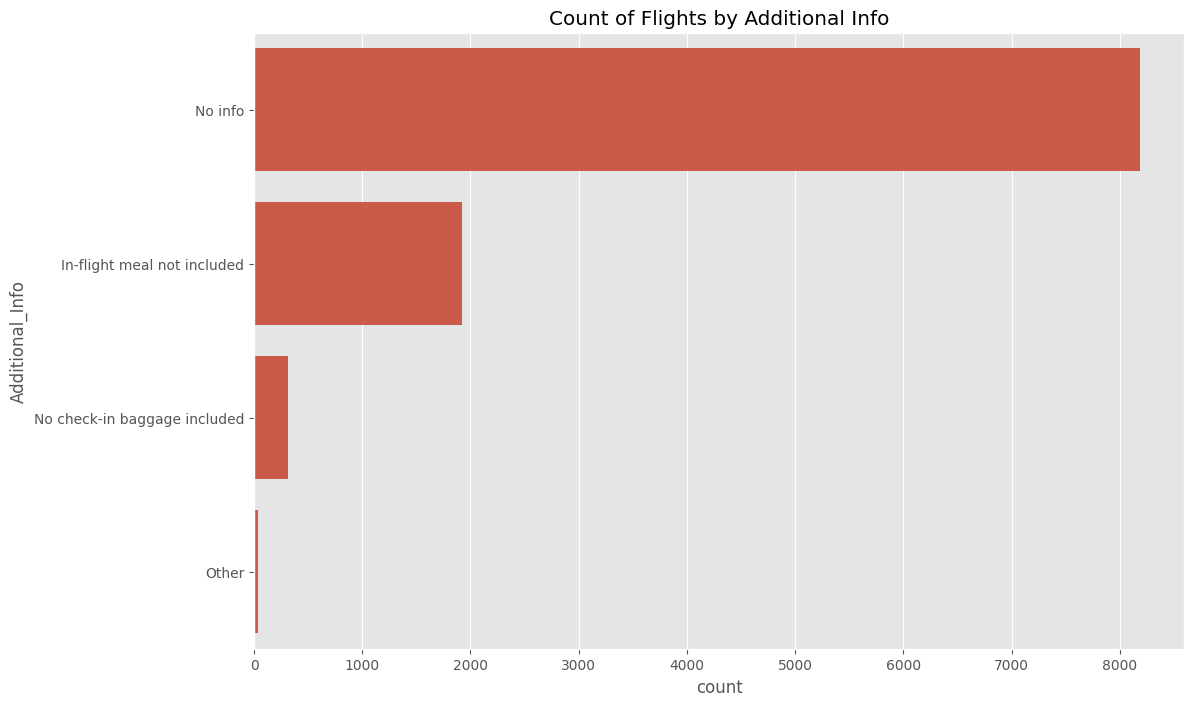

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(y='Additional_Info', data=df)
plt.title('Count of Flights by Additional Info')
plt.show()

### Question 2: What is the distribution of flight durations?


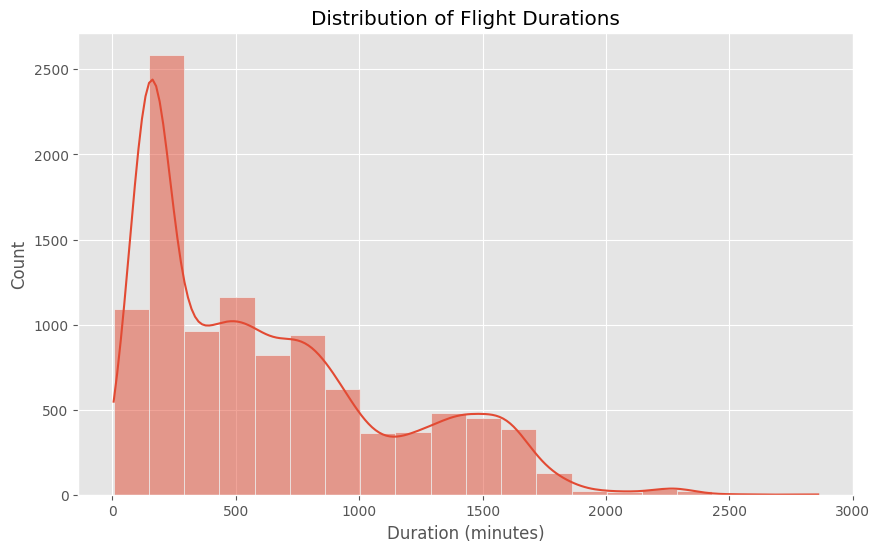

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration (minutes)'], bins=20, kde=True)
plt.title('Distribution of Flight Durations')
plt.show()

### Question 3: How does the 'Arrival_Period' affect the flight prices?

<Figure size 1000x600 with 0 Axes>

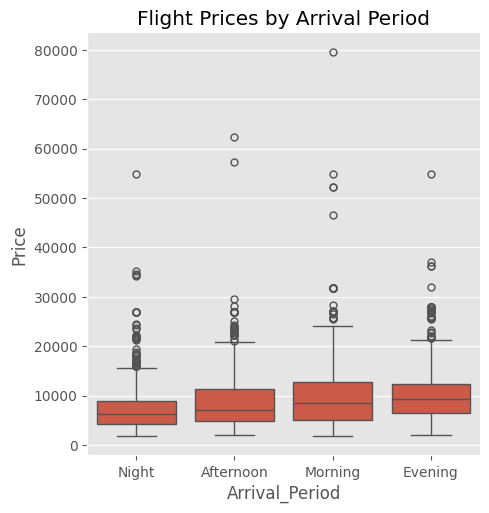

In [68]:
plt.figure(figsize=(10, 6))
sns.catplot(x='Arrival_Period', y='Price', kind='box', data=df)
plt.title('Flight Prices by Arrival Period')
plt.show()

### Question 4: What is the relationship between 'Total_Stops' and 'Price'?


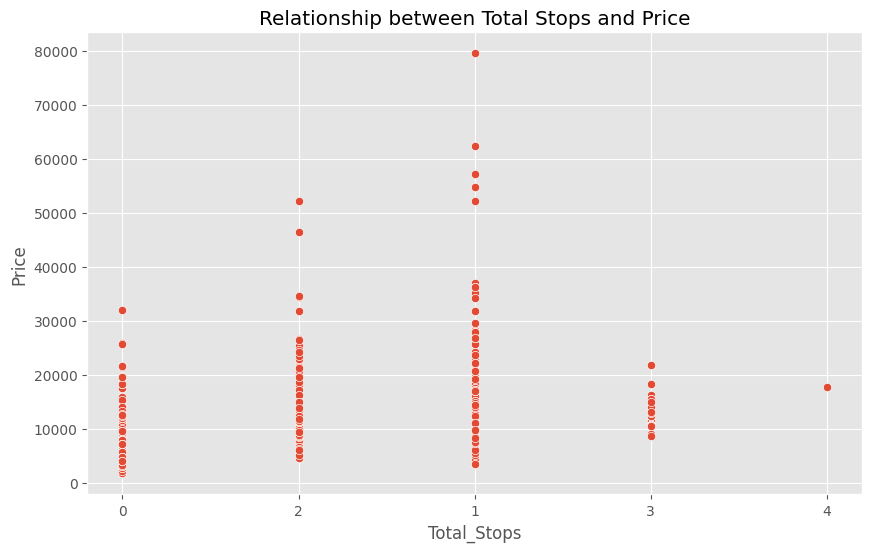

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Stops', y='Price', data=df)
plt.title('Relationship between Total Stops and Price')
plt.show()

### Question 5: What is the average price of flights for each 'Dep_Period'?)

In [70]:
answer_5 = df.groupby('Dep_Period')['Price'].mean()
answer_5

Dep_Period
Afternoon    9178.225215
Evening      8905.075694
Morning      9076.883015
Night        7968.101695
Name: Price, dtype: float64

### Question 6: What is the distribution of 'Total_Stops' in the dataset?)

In [71]:
answer_6 = df['Total_Stops'].value_counts()
answer_6

Total_Stops
1    5624
0    3475
2    1318
3      43
4       1
Name: count, dtype: int64

### Question 7: Can we visualize the distribution of flight prices using a boxplot?

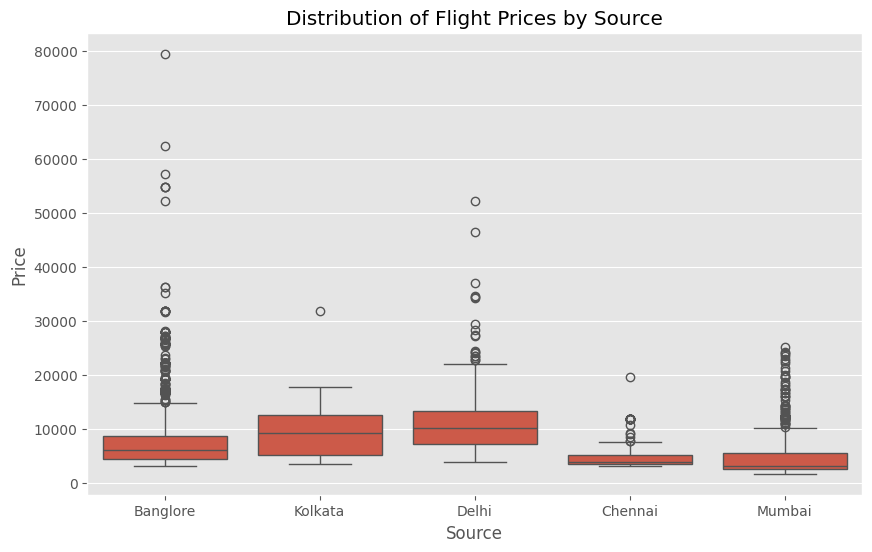

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Source', y='Price', data=df)
plt.title('Distribution of Flight Prices by Source')
plt.show()

### Question 8: How does the 'Duration (minutes)' vary based on the number of stops?ow()

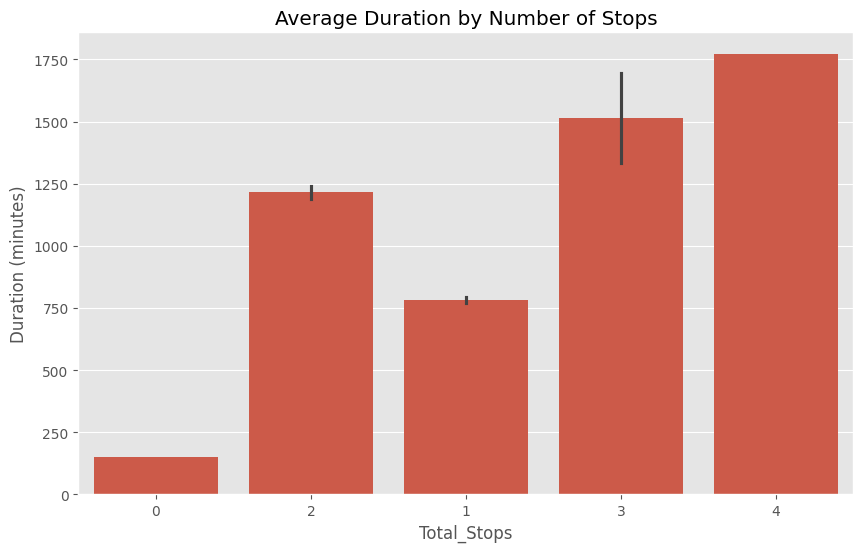

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Stops', y='Duration (minutes)', data=df)
plt.title('Average Duration by Number of Stops')
plt.show()

In [74]:
df.drop(['Duration','Date_of_Journey','Arrival_Time','Dep_Time','Route','Arrival_time'] , axis=1 , inplace=True)

In [75]:
df.duplicated().sum()

158

In [76]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True , inplace=True)

# ::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

# Model Prepare

In [77]:
# Importing necessary libraries for data preprocessing, modeling, and evaluation in machine learning.

# Data Preprocessing
from sklearn.preprocessing import OneHotEncoder , RobustScaler ,LabelEncoder,MinMaxScaler,StandardScaler,OrdinalEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor  # Changed to KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor  # Changed to DecisionTreeRegressor
from sklearn.svm import SVR  # Changed to Support Vector Regressor (SVR)
from sklearn.ensemble import RandomForestRegressor  # Changed to RandomForestRegressor
from xgboost import XGBRegressor  # Changed to XGBRegressor


# Model Evaluation and Metrics
from sklearn.metrics import r2_score,confusion_matrix,recall_score,precision_score,f1_score,fbeta_score,accuracy_score

# Other
from scipy.stats import randint

In [78]:
df

Airline    Source Destination Total_Stops  \
0           IndiGo  Banglore   New Delhi           0   
1        Air India   Kolkata    Banglore           2   
2      Jet Airways     Delhi      Cochin           2   
3           IndiGo   Kolkata    Banglore           1   
4           IndiGo  Banglore   New Delhi           1   
...            ...       ...         ...         ...   
10298     SpiceJet  Banglore       Delhi           0   
10299     Air Asia   Kolkata    Banglore           0   
10300    Air India   Kolkata    Banglore           0   
10301      Vistara  Banglore   New Delhi           0   
10302    Air India     Delhi      Cochin           2   

                    Additional_Info    Price  month_of_Journey  \
0                           No info   3897.0                 3   
1                           No info   7662.0                 5   
2                           No info  13882.0                 6   
3                           No info   6218.0                 5   
4                           No info  13302.0                 3   
...                             ...      ...               ...   
10298  No check-in baggage included   3257.0                 5   
10299                       No info   4107.0                 4   
10300                       No info   4145.0                 4   
10301                       No info  12648.0                 3   
10302                       No info  11753.0                 5   

       day_of_Journey Dep_Period Arrival_Period  Duration (minutes)  
0                  24    Evening          Night                 170  
1                   1    Morning      Afternoon                 445  
2                   9    Morning        Morning                1140  
3                  12    Evening        Evening                 325  
4                   1  Afternoon        Evening                 285  
...               ...        ...            ...                 ...  
10298              21    Morning        Morning                 160  
10299               9    Evening        Evening                 150  
10300              27    Evening        Evening                 155  
10301               1    Morning      Afternoon                 160  
10302               9    Morning        Evening                 500  

[10303 rows x 11 columns]

In [79]:
# Assuming df is your DataFrame
# Encoder for label encoding
label_encoder = OrdinalEncoder()

# Columns to be label encoded
label_encoded_columns = ['Airline', 'Source', 'Destination', 'Additional_Info', 'Dep_Period', 'Arrival_Period']

# Columns to be passed through
remaining_columns = [col for col in df.columns if col not in label_encoded_columns]

# Creating ColumnTransformer
Encoder = ColumnTransformer(
    transformers=[
        ("LabelEncoder", label_encoder, label_encoded_columns)
    ],
    remainder="passthrough"
)

In [80]:
# Splitting the DataFrame into feature variables (x) and the target variable (y).

# Features (x) exclude the 'Price' column.
x = df.drop('Price', axis=1)

# Target variable (y) is the 'Price' column.
y = df['Price']

# Initialize a list of machine learning models for regression.
models = []

# Add models to the list along with their abbreviated names and corresponding model objects.
models.append(("LR", LinearRegression()))  # Linear Regression
models.append(("CART", DecisionTreeRegressor()))  # Decision Tree Regressor
models.append(("XG", XGBRegressor()))  # XGBoost Regressor
models.append(("KN", KNeighborsRegressor()))  # k-Nearest Neighbors Regressor
models.append(("RF", RandomForestRegressor()))  # Random Forest Regressor
models.append(("SVM", SVR()))  # Support Vector Regressor (SVM)

from sklearn.metrics import r2_score

# Looping through each machine learning model, applying preprocessing steps, and evaluating performance.
       # Apply RobustScaler for feature scaling.
# Looping through each machine learning model, applying preprocessing steps, and evaluating performance.
for model in models:
    # Create a list of steps in the pipeline.
    steps = []
    steps.append(("Encoder", Encoder))# Apply the ColumnTransformer 'preprocessor'.
    steps.append(("Scaler", RobustScaler()))
    steps.append(model)  # Add the current machine learning model.

    # Create a pipeline with the specified steps.
    pipeline = Pipeline(steps=steps)

    try:
        # Perform cross-validated scoring for the pipeline using R2 score.
        scores = cross_validate(pipeline, x, y, cv=5, scoring="r2", return_train_score=True, error_score='raise')

        # Print the model name and corresponding training and testing R2 scores.
        print(model[0])
        print("Train_R2_score", scores["train_score"].mean())
        print("-" * 10)
        print("Test_R2_score", scores["test_score"].mean())
        print("-" * 20)
        print("\n")
    except Exception as e:
        print(f"Error for model {model[0]}: {e}")


LR
Train_R2_score 0.4441420943366333
----------
Test_R2_score 0.4433633088690989
--------------------


CART
Train_R2_score 0.9941493379441695
----------
Test_R2_score 0.756672969684104
--------------------


XG
Train_R2_score 0.9595407976149357
----------
Test_R2_score 0.8562974336221053
--------------------


KN
Train_R2_score 0.8649924449799021
----------
Test_R2_score 0.790591480784508
--------------------


RF
Train_R2_score 0.9752303752618596
----------
Test_R2_score 0.8504292628010308
--------------------


SVM
Train_R2_score 0.032742119446120974
----------
Test_R2_score 0.032290629967075414
--------------------




In [81]:
# Create a machine learning pipeline with data preprocessing (StandardScaler) and a RandomForestClassifier model.
steps = []  # Initialize a list to store the steps in the pipeline.
steps.append(("Encoder" , Encoder))
# Add data preprocessing step: Scaling features using RobustScaler.
steps.append(("Scaler", RobustScaler()))

# Add the machine learning model: RandomForestClassifier.
steps.append(('Model', XGBRegressor()))

# Create the pipeline by specifying the steps.
pipeline = Pipeline(steps=steps)
pipeline

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('LabelEncoder',
                                                  OrdinalEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info',
                                                   'Dep_Period',
                                                   'Arrival_Period'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

## GridSearchCV

In [82]:
# Dictionary containing hyperparameter values for grid search.

params = {
    'Model__max_depth': [2, 3, 5 , 8],
    'Model__n_estimators': [80, 70 , 50]
}


In [83]:
# Creating a GridSearchCV object for hyperparameter tuning.

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=params,
    cv=5,
    return_train_score=True,
    scoring="r2",
    error_score='raise'
)


In [84]:
grid.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('LabelEncoder',
                                                                         OrdinalEncoder(),
                                                                         ['Airline',
                                                                          'Source',
                                                                          'Destination',
                                                                          'Additional_Info',
                                                                          'Dep_Period',
                                                                          'Arrival_Period'])])),
                                       ('Scaler', RobustScaler()),
                                       ('Model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     callbacks=None,
                                                     colsamp...
                                                     max_cat_threshold=None,
                                                     max_cat_to_onehot=None,
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None,
                                                     random_state=None, ...))]),
             param_grid={'Model__max_depth': [2, 3, 5, 8],
                         'Model__n_estimators': [80, 70, 50]},
             return_train_score=True, scoring='r2')

In [85]:
# Retrieving and printing the best parameters and score from the GridSearchCV results.

best_params = grid.best_params_
best_score = grid.best_score_

# Print or use the best parameters and score as needed
print("Best Parameters:", best_params)
print("-" * 100)
train_scores = grid.cv_results_["mean_train_score"].max()
test_scores = grid.cv_results_["mean_test_score"].max()
print(f"Train Accuracy={train_scores}, Test Accuracy={test_scores}")

Best Parameters: {'Model__max_depth': 8, 'Model__n_estimators': 70}
----------------------------------------------------------------------------------------------------
Train Accuracy=0.9802407421260328, Test Accuracy=0.8550074206639986


In [88]:
pipeline.fit(x, y)

Pipeline(steps=[('Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('LabelEncoder',
                                                  OrdinalEncoder(),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Additional_Info',
                                                   'Dep_Period',
                                                   'Arrival_Period'])])),
                ('Scaler', RobustScaler()),
                ('Model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [89]:
# Save the trained machine learning pipeline to a file named 'model.pkl'.
joblib.dump(pipeline, 'model.pkl')
# Save the feature column names to a file named 'inputs.pkl'.
joblib.dump(x.columns, 'inputs.pkl')

['inputs.pkl']

In [90]:
%%writefile app.py
# Import necessary libraries.
import streamlit as st
import pandas as pd
import joblib

# Load the trained model and feature names
model = joblib.load("model.pkl")
inputs = joblib.load("inputs.pkl")

# Define a function for making predictions
def predict_flight_price(Airline, Source, Destination, Total_Stops, Additional_Info, month, day, 
                          Dep_Period, Arrival_Period, Duration_minutes):
    # Create a DataFrame with columns based on feature names.
    df = pd.DataFrame(columns=inputs)
    # Set the provided input values in the DataFrame.
    df.at[0, 'Airline'] = Airline
    df.at[0, 'Source'] = Source
    df.at[0, 'Destination'] = Destination
    df.at[0, 'Total_Stops'] = Total_Stops
    df.at[0, 'Additional_Info'] = Additional_Info
    df.at[0, 'month_of_Journey'] = month
    df.at[0, 'day_of_Journey'] = day
    df.at[0, 'Dep_Period'] = Dep_Period
    df.at[0, 'Arrival_Period'] = Arrival_Period
    df.at[0, 'Duration_minutes'] = Duration_minutes
    # Use the model to make predictions.
    price_prediction = model.predict(df)
    return price_prediction[0]

# Define the main function for the Streamlit app.
def main():
    # Create a Streamlit web interface.
    st.title("Flight Price Prediction")

    # Create input fields for user input
    features = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'month', 'day',
                'Dep_Period', 'Arrival_Period', 'Duration_minutes']

    input_values = [st.text_input(feature) for feature in features]

    if st.button("Predict"):
        # Call the prediction function and display the result
        price_result = predict_flight_price(*input_values)
        st.write(f"Predicted Flight Price: {price_result} INR")

if __name__ == "__main__":
    main()


Overwriting app.py
